<h1>The Movies Dataset</h1>
<h3>Overview</h3>
    
<p>This dataset is of ~5000 movies. Its data has been collected from IMDB. It collects attributes such as the budget, popularity, revenue, title, production companies and countries, runtime, vote average, vote count and others for every movie in the dataset. The target attribute is created from the vote average feature column, where it was binarized based on the condition of whether the vote average instance value exceeds the set threshold (6.5/10 in this assignment) or not.
The assignment task is pretty educational in nature. I will be trying to predict whether a movie rating exceeds 6.5 using the other attributes, meaning I want to try and create models that learn useful information from the other movie attributes, both numerical and categorical. I chose this task because I think it is interesting to realize the limitations and how far can you go with the data that you have.</p>



<h3>List of Example Feature Columns</h3>

<ul>
    <li>Genres</li>
    <li>Cast</li>
    <li>Crew</li>
    <li>Popularity</li>
    <li>Revenue</li>
    <li>Budget</li>
    <li>Production Companies</li>
    <li>Production Countries</li>
    <li>Vote Average</li>
    <li>Vote Count</li>
</ul>

<h1>Preparation</h1>
<h2>Definition of Dataset Variables</h2>

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import json
import ast

<h3>Data Processing</h3>

In [137]:
credits_dataframe = pd.read_csv("E:/ABDALLAH THE GREAT ENGINEER/Southern Methodist University/Coursework/Spring 2018/Machine Learning in Python/tmdb-5000-movie-dataset/tmdb_5000_credits.csv")
movies_dataframe = pd.read_csv("E:/ABDALLAH THE GREAT ENGINEER/Southern Methodist University/Coursework/Spring 2018/Machine Learning in Python/tmdb-5000-movie-dataset/tmdb_5000_movies.csv")

In [138]:
dataframe = pd.merge(movies_dataframe, credits_dataframe, left_on='id', right_on='movie_id', how='inner')

In [139]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

<h3>Removing Un-necessary Feature Columns</h3>

In [140]:
dataframe = dataframe.drop(['homepage', 'overview', 'status', 'tagline', 'title_x', 'title_y', 'crew'], axis = 1)

<h3>Extracting Categorical Feature Columns from the JSON-looking data in the Original Dataframe</h3>

In [141]:
# Processing the genres column
dataframe.insert(column = 'genre1', loc = 3, value = str)

In [142]:
for i in range(len(dataframe['genres'])):
    m = len(ast.literal_eval(dataframe.iloc[i, dataframe.columns.get_loc('genres')]))
    if (m > 0):
        dataframe.iloc[i, dataframe.columns.get_loc('genre1')] =  ast.literal_eval(dataframe.iloc[i, dataframe.columns.get_loc('genres')])[0]['name']
    else:
        dataframe.iloc[i, dataframe.columns.get_loc('genre1')] =  ''

In [143]:
# Processing the cast column
dataframe.insert(column = 'actor1', loc = 6, value = str)

In [144]:
for i in range(len(dataframe['cast'])):
    m = len(ast.literal_eval(dataframe.iloc[i, dataframe.columns.get_loc('cast')]))
    if (m > 0):
        dataframe.iloc[i, dataframe.columns.get_loc('actor1')] =  ast.literal_eval(dataframe.iloc[i, dataframe.columns.get_loc('cast')])[0]['name']
    else:
        dataframe.iloc[i, dataframe.columns.get_loc('actor1')] =  ''

In [145]:
# Processing the production companies column
dataframe.insert(column = 'company1', loc = 9, value = str)

In [146]:
for i in range(len(dataframe['production_companies'])):
    m = len(ast.literal_eval(dataframe.iloc[i, dataframe.columns.get_loc('production_companies')]))
    if (m > 0):
        dataframe.iloc[i, dataframe.columns.get_loc('company1')] =  ast.literal_eval(dataframe.iloc[i, dataframe.columns.get_loc('production_companies')])[0]['name']
    else:
        dataframe.iloc[i, dataframe.columns.get_loc('company1')] =  ''

In [147]:
# Processing the production countries column
dataframe.insert(column = 'country1', loc = 12, value = str)

In [148]:
for i in range(len(dataframe['production_countries'])):
    m = len(ast.literal_eval(dataframe.iloc[i, dataframe.columns.get_loc('production_countries')]))
    if (m > 0):
        dataframe.iloc[i, dataframe.columns.get_loc('country1')] =  ast.literal_eval(dataframe.iloc[i, dataframe.columns.get_loc('production_countries')])[0]['name']
    else:
        dataframe.iloc[i, dataframe.columns.get_loc('country1')] =  ''

In [149]:
# Processing the keywords column
dataframe.insert(column = 'keyword1', loc = 15, value = str)

In [150]:
for i in range(len(dataframe['keywords'])):
    m = len(ast.literal_eval(dataframe.iloc[i, dataframe.columns.get_loc('keywords')]))
    if (m > 0):
        dataframe.iloc[i, dataframe.columns.get_loc('keyword1')] =  ast.literal_eval(dataframe.iloc[i, dataframe.columns.get_loc('keywords')])[0]['name']
    else:
        dataframe.iloc[i, dataframe.columns.get_loc('keyword1')] =  ''

In [151]:
# Processing the runtime column into a categorical feature column
dataframe.insert(column = 'runtime_cat', loc = 15, value = str)
dataframe['runtime'] = dataframe['runtime'].apply(lambda x: np.ceil(x/60))
dataframe['runtime_cat'] = pd.cut(dataframe['runtime'],[1,2,3,4,5,6,7,8,9,10],
                                 labels=['Short','Normal','Long','Very Long', 'Un-Watchable', 'Really?', 'Really??', 'REALLY?', 'REALLY??'])

<h3>Dropping Additional Un-necessary Feature Columns and Cumbersome Instances</h3>

In [152]:
dataframe = dataframe.drop(['genres', 'production_companies','production_countries', 'cast', 'keywords','movie_id','spoken_languages','runtime'], axis = 1)

In [153]:
dataframe = dataframe.drop([2386, 546,95,127,28,199,788, 94, 3285, 3843, 4666])
dataframe = dataframe.dropna(axis = 0, how='any')

<h3>Scaling the Popularity Index and Quantizing it To Later Be Made Into a Categorical Feature Column</h3>
<p>This is done to increase the number of movie performance-based categorical variables. It may or may not produce any useful effects to the overall analysis.</p>

In [154]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = dataframe['popularity'].values.reshape(-1,1)
dataframe['popularity'] = np.int64(np.ceil(ss.fit(x).transform(x)))

In [155]:
dataframe.insert(column = 'popularity_cat', loc = 15, value = str)

dataframe['popularity_cat'] = pd.cut(dataframe['popularity'],[0,1,2,3,4,5,6,7,8,9,10], 
                                  labels=['0','1','2','3','4', '5', '6', '7', '8', '9'], include_lowest = True)

In [156]:
dataframe = dataframe.drop(['popularity'], axis = 1)

<h3>Creating a binary classification task for the dataset</h3>
<p>Here, I create a binary classification task for the movies dataset based on the vote average feature column. If the vote average of the movie is larger than 6.5, the feature value is True and False otherwise.</p>

In [157]:
dataframe.insert(column = 'target', loc = 15, value = int)

In [158]:
dataframe['target'] = dataframe['vote_average'].apply(lambda x: x > 6.5)

<h3>Further cleaning of the dataset</h3>

In [159]:
cols = ['genre1', 'actor1', 'company1', 'country1', 'keyword1']

for col in cols:
    dataframe = dataframe.drop(dataframe[dataframe[col] == ''].index)

<h3>Final Dataset</h3>

<p>
    To arrive at the final dataset, I have performed the following operations:
    <ul>
        <li>Extracted the first instance of the genres, cast, production companies, production countries, and keywords feature columns for every movie into separate feature columns.</li>
        <li>After processing the data into a useful format, the processed variables were deleted as they're no longer relevant in the analysis to follow.</li>
        <li>The <b>runtime</b> and <b>popularity</b> feature columns have been made into categorical features.</li>
    </ul>


<p>This is the data that I end up with:</p>
    
<table>
  <tr>
    <th>Attribute</th>
    <th>Type</th> 
  </tr>
  <tr>
    <td>budget</td>
    <td>Numeric</td> 
  </tr>
  <tr>
    <td>genre1</td>
    <td>Categorical</td> 
    </tr>
  <tr>
    <td>keyword1</td>
    <td>Categorical</td> 
  </tr>

  
  <tr>
    <td>actor1</td>
    <td>Categorical</td> 
  </tr>

  
  <tr>
    <td>company1</td>
    <td>Categorical</td> 
  </tr>

  
  <tr>
    <td>country1</td>
    <td>Categorical</td> 
  </tr>

  
  <tr>
    <td>id</td>
    <td>Numeric</td> 
  </tr>

  <tr>
    <td>original_language</td>
    <td>Categorical</td> 
  </tr>
  <tr>
    <td>original_title</td>
    <td>String</td> 
  </tr>

  <tr>
    <td>popularity_cat</td>
    <td>String</td> 
  </tr>

  <tr>
    <td>release_date</td>
    <td>DateTime</td> 
  </tr>
  <tr>
    <td>revenue</td>
    <td>Numeric</td> 
  </tr>
  <tr>
    <td>vote_count</td>
    <td>Numeric</td> 
  </tr>
  
  <tr>
    <td>runtime</td>
    <td>Categorical</td> 
  </tr>
  
  <tr>
    <td>vote_average</td>
    <td>Numeric</td> 
  </tr>
  
  <tr>
    <td>target</td>
    <td>boolean</td> 
  </tr>
  
  
  </table>

</p>

<p>As can be seen below, we have the shown attributes for <b>4152</b> movies, which were procured from two CSV files and joined by an id column. The data is clean - there is no missing data in the dataframe.</p>

In [160]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4152 entries, 0 to 4802
Data columns (total 16 columns):
budget               4152 non-null int64
id                   4152 non-null int64
genre1               4152 non-null object
original_language    4152 non-null object
actor1               4152 non-null object
original_title       4152 non-null object
company1             4152 non-null object
country1             4152 non-null object
release_date         4152 non-null object
revenue              4152 non-null int64
runtime_cat          4152 non-null category
keyword1             4152 non-null object
vote_average         4152 non-null float64
vote_count           4152 non-null int64
popularity_cat       4152 non-null category
target               4152 non-null bool
dtypes: bool(1), category(2), float64(1), int64(4), object(8)
memory usage: 467.1+ KB


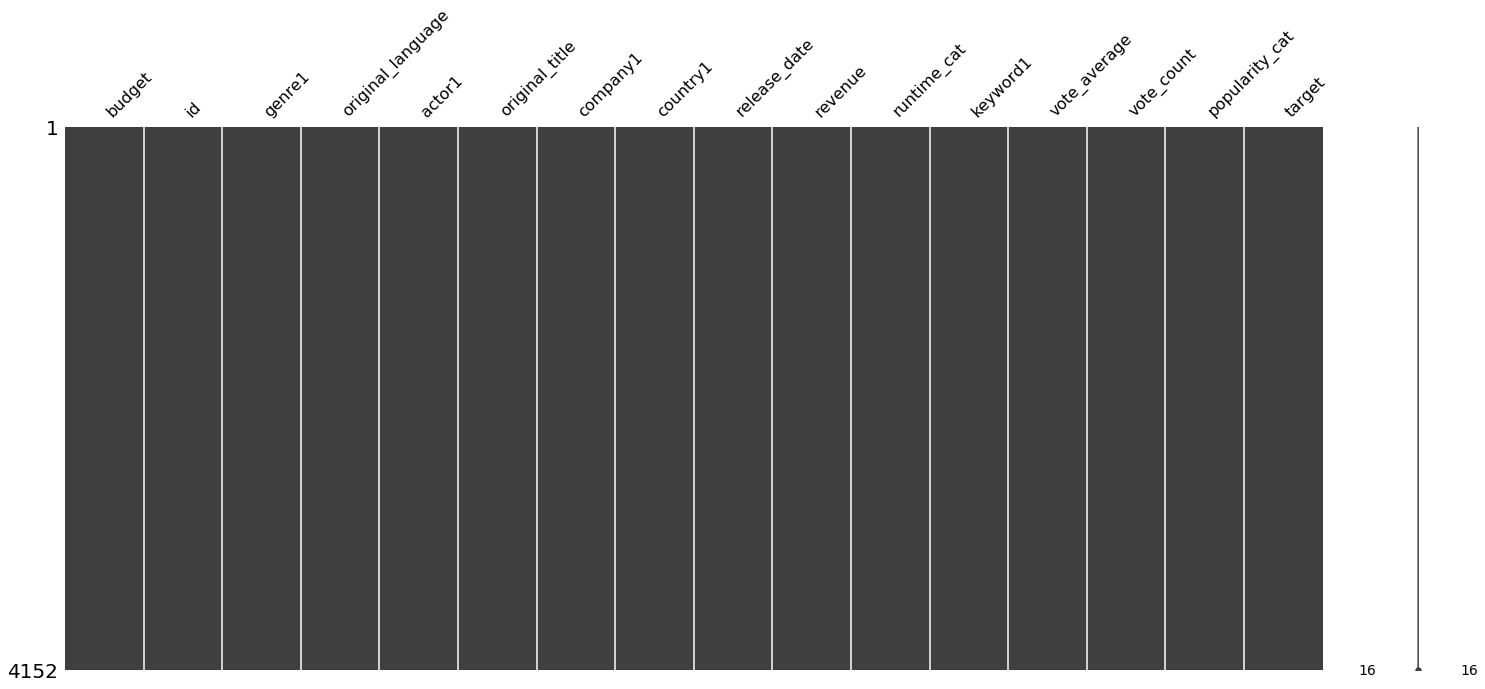

In [161]:
import missingno as mn
mn.matrix(dataframe.sort_values(by=["id"]))

<h3>Classification Task</h3>
<p>The classification task chosen for this dataset is to predict whether the vote average of a movie exceeds 6.5/10. I want to create KERAS models that evaluate whether a movie vote average exceeds a specific value (6.5/10 in this case) given other attributes. There are numeric attributes in the dataset which one might think correlate to vote average (popularity, vote count, revenue) and categorical feature columns (keywords, genres, etc.) that might also have some correlation to the vote average of a movie. The task is educational in nature. I think it would be interesting to see how the models perform.</p>

In [162]:
cross_columns = [['actor1','original_title'],
                 ['actor1','popularity_cat','genre1'],
                 ['company1','actor1'],
                 ['actor1', 'genre1'],
                 ['genre1', 'popularity_cat']]

<h3>Feature Columns to be Crossed Together</h3>
<p>
   <ul>
       <ol>
           <li>actor1 with original_title. The same actor could be in a franchise.</li>
           <li>genre1 with actor1. An actor could be tied down to a few genres. Injects the effect of preferred genres for the main actor, if any.</li>
           <li>actor1 with company1. An actor could be working with a few production companies. There might be something here.</li>

           <li>popularity_cat with genre1. Injects the effect of the genres of the movie on the popularity index.</li>
           <li>actor1 with popularity_cat with genre1. It makes sense to cross those, as they could reveal useful information for my prediction task.</li>

       </ol>    
   </ul>
</p>

<h3>Metric for Evaluating General Model Performance</h3>
<p>I choose Accuracy as a measure of performance for the models to follow, because:
<ol>
    <li>The classification task is mundane. I am only trying to predict whether the vote average of a movie exceeds 6.5 based on established data about the movies. The classification task would be more serious in case we were trying to predict vote average prior to the release of the movie. Here, with the dataset I am working with, I am only trying to predict vote average post release of the movies to test the effictiveness of different model architectures.</li>
    <li>There is no cost for missclassification of the data, therefore, accuracy is the chosen measure, especially that it is a good quantification of generalization performance.</li>
</ol>

<p>

<h3>Division of Training and Testing Data</h3>
<p>
    <ul>
        <li>The dataset will be split according to 80/20 for training/testing.</li>
        <li>Stratified K-Folding will be used on the 80% training dataset for cross validation. Stratified K-Folds are appropriate because I want to make sure that each fold is a perfect representative of the overall training dataset.</li>
        <li>Finally, the model with the best statistical quantities resulting from trying different models will be tested using the untouched 20% of the data. Its performance in classifying those 20% of data dictates its generalization performance.</li>
    </ul>
</p>

<h1>Modeling</h1>

In [181]:
from sklearn import metrics as mt
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Merge, concatenate
from keras.models import Model

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/abdallah.jabr/Anaconda3/Library/bin/graphviz/bin/'
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

<h2>Data Split</h2>

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import itertools

In [182]:
# A function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
np.set_printoptions(precision=2)

In [183]:
# Defining the numeric and categorical feature columns that will be used in the analysis to follow
categorical_headers = ['popularity_cat','company1', 'country1', 'actor1', 'keyword1','original_title','genre1']
numeric_headers = ['budget', 'vote_count', 'revenue']

# Copying the original dataframe for later work
from copy import deepcopy
dataframe_enc = deepcopy(dataframe)

# Scaling numeric features
ss = StandardScaler()
ss.fit(dataframe_enc[numeric_headers])
dataframe_enc[numeric_headers] = ss.transform(dataframe_enc[numeric_headers]) 

# Integer-encoding categorical features
encoders = dict() 

for col in categorical_headers:
    dataframe_enc[col] = dataframe_enc[col].str.strip()
    encoders[col] = LabelEncoder()
    dataframe_enc[col+'_int'] = encoders[col].fit_transform(dataframe_enc[col])

categorical_headers_ints = [x +'_int' for x in categorical_headers]

# Splitting the dataframe into 80/20 for training/testing
df_train, df_test = train_test_split(dataframe_enc, test_size=0.2, shuffle= True, stratify = dataframe_enc['target'])

# Numeric feature values for the training and testing portions of the dataset
X_train_num =  df_train[numeric_headers].values
X_test_num = df_test[numeric_headers].values

# Training/testing target values
y_train = df_train['target'].values
y_test =  df_test['target'].values

<h2>First Keras Model</h2>
<p><b>First Keras Model:</b> Embeddings for the categorical attributes, no crossed columns, 2 dense layers for numerical attributes, and then all concatenated through a dense layer.</p>

In [184]:
# This model architecture and code has been adapted from the professor's notebook

embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_branch_outputs = []


# Creating inputs and Embeddings for the categorical features
for col in categorical_headers_ints:

    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    N = max(X_ints_train[-1]+1)
    
    inputs = Input(shape = (1,), dtype='int32')
    all_inputs.append( inputs )
    
    x = Embedding(input_dim = N, 
                  output_dim = int(np.sqrt(N)), 
                  input_length = 1)(inputs)
    
    x = Flatten()(x)
    
    all_branch_outputs.append(x)

# Creating inputs and a dense layer for the numerical features
all_inputs.append(Input(shape = (X_train_num.shape[1],), sparse=False))
x = Dense(units=20, activation='relu')(all_inputs[-1])
all_branch_outputs.append( Dense(units=10,activation='relu')(x))

# Forming the final branch of the network architecture
final_branch = concatenate(all_branch_outputs)
final_branch = Dense(units=1, activation='sigmoid')(final_branch)

# Instantiating an object model
model = Model(inputs=all_inputs, outputs=final_branch)

<h4>Model Plot</h4>

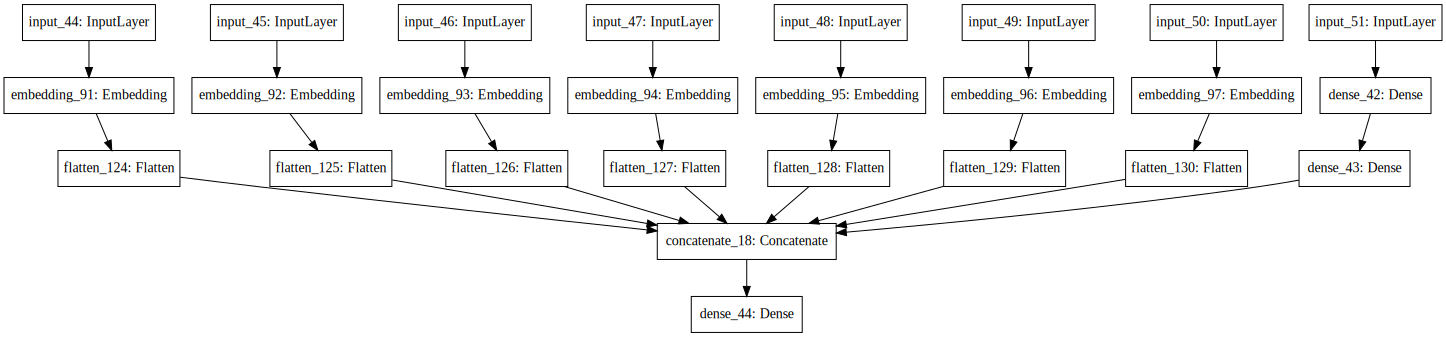

In [185]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

<h4>First Model Evaluation</h4>

In [186]:
%%time

model.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_ints_train + [X_train_num],
                    y_train, 
                    epochs=10, 
                    batch_size=75, 
                    verbose=0, 
                    validation_data = (X_ints_test + [X_test_num], y_test))

Wall time: 5.11 s


The accuracy of the first Keras Model is: 71.23947051744885 %


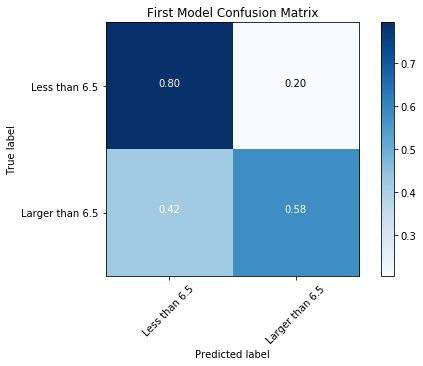

In [187]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
cf1 = mt.confusion_matrix(y_test,yhat)
acc = mt.accuracy_score(y_test,yhat)

plt.figure(figsize = (7, 5))
plot_confusion_matrix(cf1,['Less than 6.5', 'Larger than 6.5'], normalize=True,title='First Model Confusion Matrix',cmap=plt.cm.Blues)
print('The accuracy of the first Keras Model is:', acc*100, '%')

<h3>Training and validation loss and accuracy as functions of iterations</h3>
<p>It can be seen that the model starts to learn smoothly and then starts to overfit a little bit after the second iteration which is seen as a decrease in the validation accuracy.</p>

Text(0.5,0,'epochs')

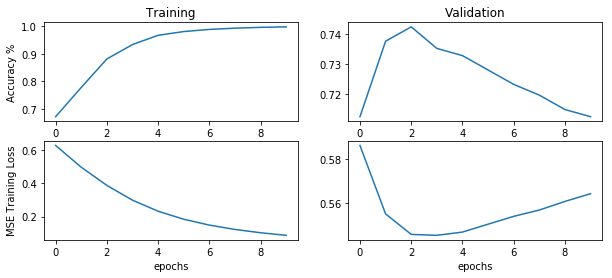

In [188]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['acc'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_acc'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('MSE Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

<h2>Second Keras Model</h2>
<p>Concatenated Embeddings for the crossed categorical attributes followed by a dense layer, concatenated with 3 deep layers of the embeddings for the individual categorical feature columns and densed numeric feature columns, followed by a concatenation of all, that are then densed to produce the output.</p>

In [197]:
# This model architecture and code has been adapted from the professor's notebook

cross_columns = [['actor1','original_title'],
                 ['actor1','popularity_cat','genre1'],
                 ['company1','actor1'],
                 ['actor1', 'genre1'],
                 ['genre1', 'popularity_cat']]


embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []

# Creating Embeddings and Inputs for the crossed categorical feature columns
for cols in cross_columns:
    
# Encoding crossed feature columns    
    enc = LabelEncoder()
    
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    N = max(X_ints_train[-1] + 1) 
    
    inputs = Input(shape=(1,),dtype='int32')
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
wide_branch = concatenate(all_wide_branch_outputs)
wide_branch = Dense(units=20,activation='sigmoid')(wide_branch)

all_deep_branch_outputs = []

# Creating Embeddings, inputs, and outputs for the integer-encoded categorical feature columns
for col in categorical_headers_ints:
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    N = max(X_ints_train[-1]+1)
    
    inputs = Input(shape=(1,),dtype='int32')
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)
    
all_inputs.append(Input(shape=(X_train_num.shape[1],), sparse=False))

x = Dense(units=20, activation='relu')(all_inputs[-1])
all_deep_branch_outputs.append( x )

# Forming the deep branch output of the network
deep_branch = concatenate(all_deep_branch_outputs)
deep_branch = Dense(units=50,activation='relu')(deep_branch)
deep_branch = Dense(units=25,activation='relu')(deep_branch)
deep_branch = Dense(units=10,activation='relu')(deep_branch)

# Forming the final branch of the network
final_branch = concatenate([wide_branch, deep_branch])
final_branch = Dense(units=1,activation='sigmoid')(final_branch)

# Instantiating an object model
model = Model(inputs=all_inputs, outputs=final_branch)

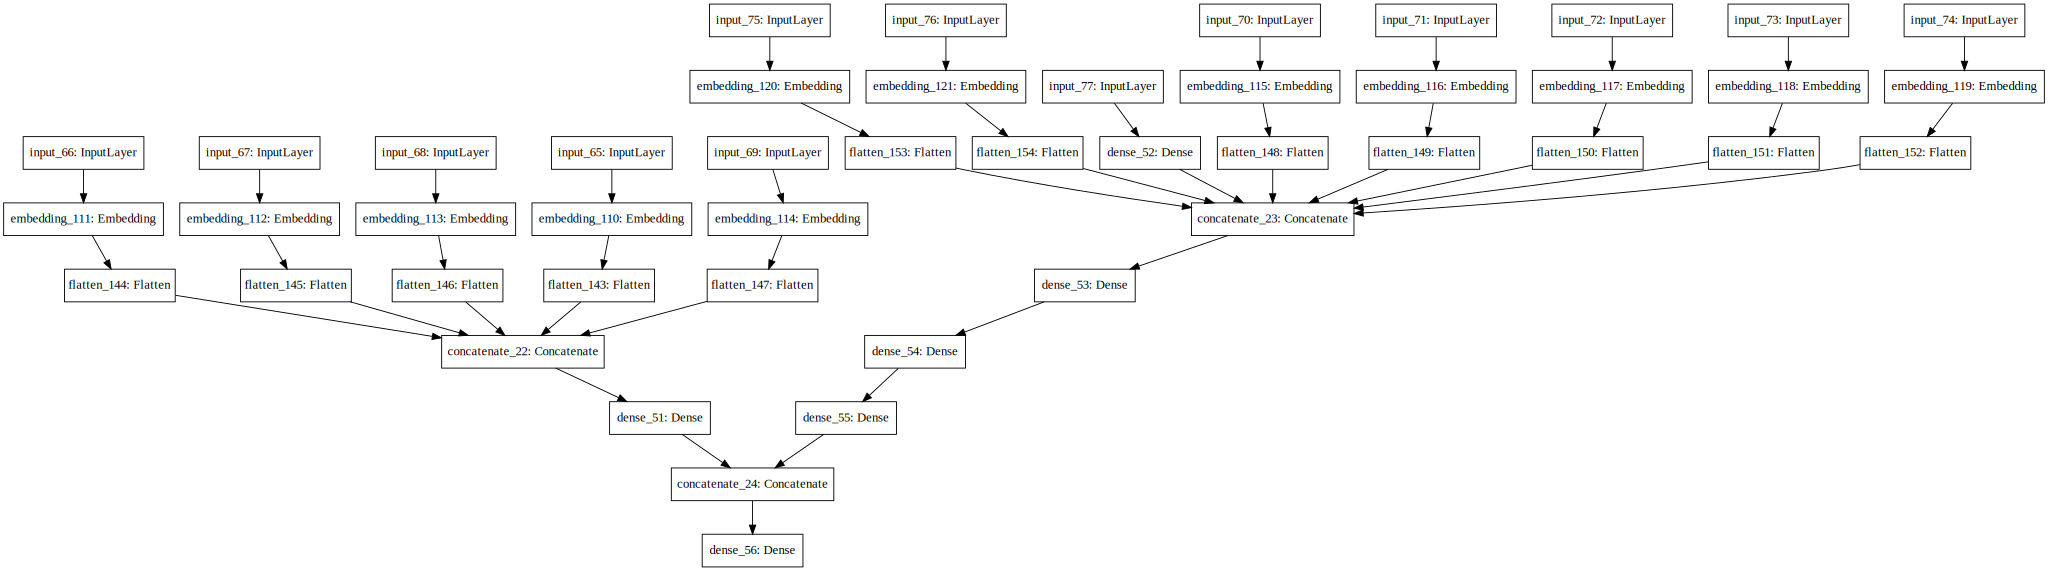

In [198]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [199]:
%%time

model.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_ints_train+ [X_train_num], y_train, epochs=10, batch_size=32, verbose=0, validation_data = (X_ints_test + [X_test_num], y_test))

Wall time: 19 s


The accuracy of the second Keras Model is: 66.4259927797834 %


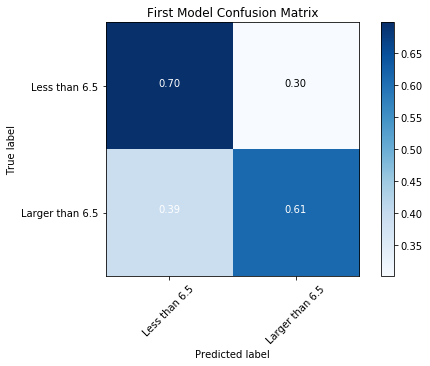

In [200]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
cf1 = mt.confusion_matrix(y_test,yhat)
acc = mt.accuracy_score(y_test,yhat)

plt.figure(figsize = (7, 5))
plot_confusion_matrix(cf1,['Less than 6.5', 'Larger than 6.5'], normalize=True,title='First Model Confusion Matrix',cmap=plt.cm.Blues)
print('The accuracy of the second Keras Model is:', acc*100, '%')

<h3>Training and validation loss and accuracy as functions of iterations</h3>
<p>It can be seen that the model starts to overfit after the 1st iteration, which is seen as a decrease in the validation accuracy below.</p>

Text(0.5,0,'epochs')

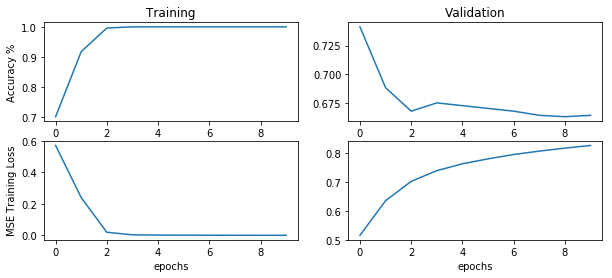

In [201]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['acc'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_acc'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('MSE Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

<h2>Third Keras Model</h2>
<p>This model consists of the same units as the pervious model, but with the individual encoded categorical feature columns as part of the wide part of the network, as opposed to being part of the deep part. Also, the deep network neurons for the numeric feature columns have been increased compared with the second architecture.</p>

In [202]:
# This model architecture and code has been adapted from the professor's notebook

cross_columns = [['actor1','original_title'],
                 ['actor1','popularity_cat','genre1'],
                 ['company1','actor1'],
                 ['actor1', 'genre1'],
                 ['genre1', 'popularity_cat']]


embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []

# Creating embeddings, inputs, and outputs for the crossed columns
for cols in cross_columns:
    enc = LabelEncoder()
    
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    N = max(X_ints_train[-1] + 1) 
    
    inputs = Input(shape=(1,),dtype='int32')
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
# Creating embeddings, inputs, and outputs for the categorical columns which now are part of the wide portion of the network 
for col in categorical_headers_ints:
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    N = max(X_ints_train[-1]+1)
    
    inputs = Input(shape=(1,),dtype='int32')
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
wide_branch = concatenate(all_wide_branch_outputs)
wide_branch = Dense(units=20,activation='sigmoid')(wide_branch)

    
# Forming the deep branch of the network containing only the numerical feature columns
all_deep_branch_outputs = []

all_inputs.append(Input(shape=(X_train_num.shape[1],), sparse=False))
x = Dense(units=20, activation='relu')(all_inputs[-1])

deep_branch = Dense(units=100,activation='relu')(x)
deep_branch = Dense(units=75,activation='relu')(deep_branch)
deep_branch = Dense(units=25,activation='relu')(deep_branch)
    
final_branch = concatenate([wide_branch, deep_branch])
final_branch = Dense(units=1,activation='sigmoid')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)

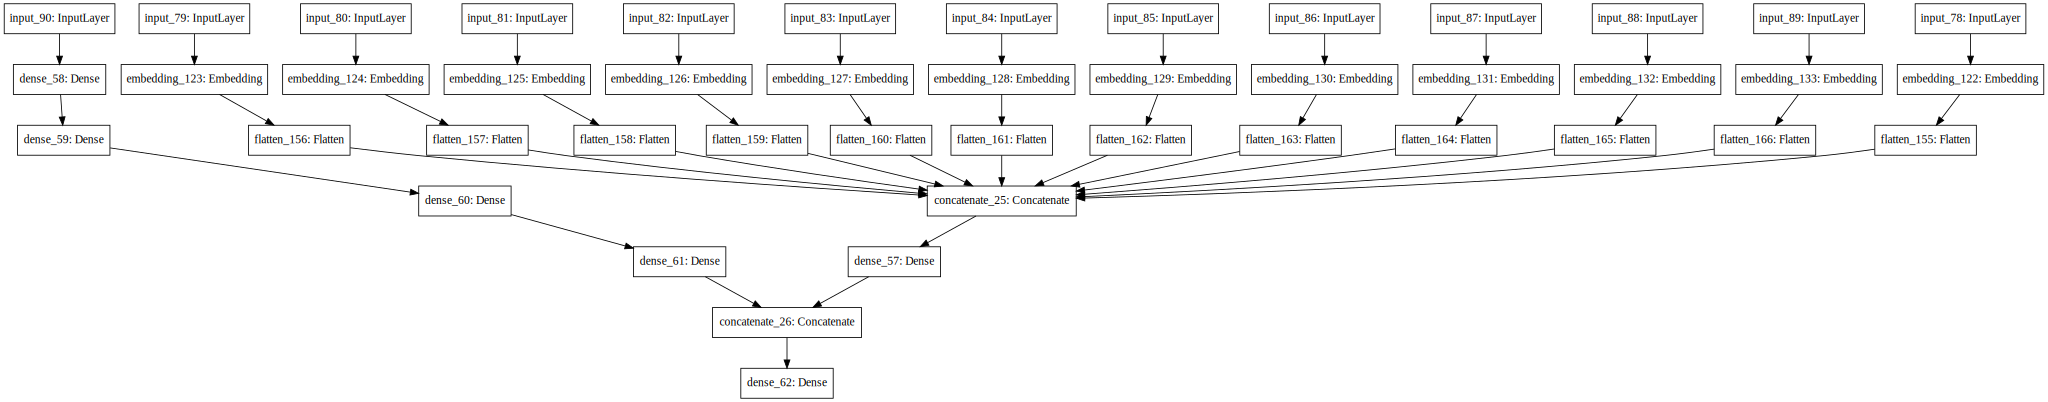

In [203]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [204]:
%%time

model.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_ints_train+ [X_train_num], y_train, epochs=10, batch_size=32, verbose=0, validation_data = (X_ints_test + [X_test_num], y_test))

Wall time: 19.6 s


The accuracy of the third Keras Model is: 68.95306859205776 %


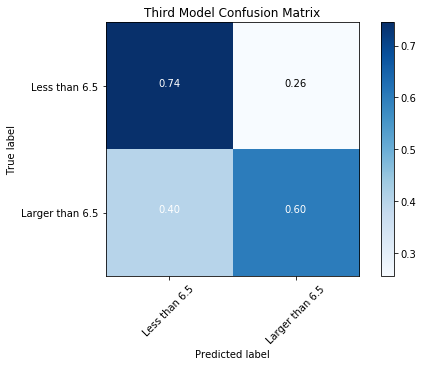

In [205]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
cf1 = mt.confusion_matrix(y_test,yhat)
acc = mt.accuracy_score(y_test,yhat)

plt.figure(figsize = (7, 5))
plot_confusion_matrix(cf1,['Less than 6.5', 'Larger than 6.5'], normalize=True,title='Third Model Confusion Matrix',cmap=plt.cm.Blues)
print('The accuracy of the third Keras Model is:', acc*100, '%')

<p>There is nothing exactly special about this architecture. It performs on par with the previous two. It starts to overfit after the first iteration.</p>

<h3>Training and validation loss and accuracy as functions of iterations</h3>

Text(0.5,0,'epochs')

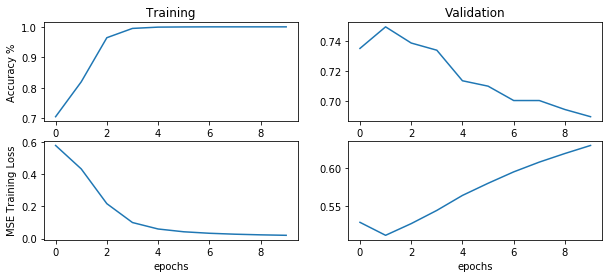

In [206]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['acc'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_acc'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('MSE Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

<p>The model starts to overtrain after the first iteration, at which point the validation accuracy takes a plung to the value shown in the figure above.</p>

<h2>Generalization Performance</h2>

In [207]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from copy import deepcopy
from sklearn.preprocessing import OneHotEncoder

<p>I will adopt a wide and deep architecure to evaluate generalization performance. I will implement the model inside a function to make it easier to evaluate for different numbers of the deep branch layers. The architecture assumes the following shape:

<ol>
    <li>A dense layer for the sparse inputs of the one-hot-encoded categorical feature columns. This represents the wide part of the network.</li>
    <li>Dense layers (specified by an argument of the function) for the numeric feature columns. This represents the deep part of the network. </li>
    <li>Concatenation of the above two, followed by a dense layer that produces the predictons of the binary task.</li>
</ol>
</p>

<p>In the code to follow, I do the following:</p>
<ol>
    <li>Encode categorical data into integer values followed by one-hot-encoding.</li>
    <li>Generate sets of stratified data from the original dataframe as specified by the argument stratified_splits.</li>
    <li>Define a function to model the wide and deep architecture and then evaluate the performance of the model. The layers argument accepts an arbitrary number of layers with an arbitrary number of neurons. The function returns the k-fold accuracy array and the accuracy for the untouched 20% of the data.
</ol>

In [208]:
# Part of this code block is adapted from the professor's notebook

def wide_and_deep(dataframe, stratified_splits, layers = [70,35,15]):
    
    k_fold_accus = []
    
    # I start by copying the dataframe
    dataframe_enc = deepcopy(dataframe)
    
    # I define encoders to integer-encode the categorical feature attributes
    encoders = dict() 
    for col in categorical_headers:
        dataframe_enc[col] = dataframe_enc[col].str.strip()
        encoders[col] = LabelEncoder()
        dataframe_enc[col + '_int'] = encoders[col].fit_transform(dataframe_enc[col])
        
    categorical_headers_ints = [x +'_int' for x in categorical_headers]
    
    # One-hot-encoding the categorical feature columns
    ohe = OneHotEncoder()
    ohe.fit(dataframe_enc[categorical_headers_ints].values)
    
    # I scale the numerical attributes of the dataset
    ss = StandardScaler()
    ss.fit(dataframe_enc[numeric_headers])
    dataframe_enc[numeric_headers] = ss.transform(dataframe_enc[numeric_headers])    
    
    # I split the processed dataframe defined above into the train/test portions (80/20)
    df_train, df_test = train_test_split(dataframe_enc, test_size=0.2, shuffle= True, stratify = dataframe_enc['target'])
    
    # I define stratified k-folding
    cv = StratifiedKFold(n_splits=stratified_splits)
    
    for train, test in cv.split(df_train, df_train['target']):
    # I define the training/validation data portions of the 80% training data
        k_train = df_train.iloc[train]
        k_test = df_train.iloc[test]
        y_train = k_train['target']
        y_test = k_test['target']
    
    # One-hot-encoding the categorical features of the k-folds
        X_train_ohe = ohe.transform(k_train[categorical_headers_ints].values)
        X_test_ohe = ohe.transform(k_test[categorical_headers_ints].values)
    # Assigning numeric values of the k-folds
        X_train_num =  k_train[numeric_headers].values
        X_test_num = k_test[numeric_headers].values
    # Defining sparse inputs
        inputsSparse = Input(shape=(X_train_ohe.shape[1],),sparse=True, name='OHE_X')
        xSparse = Dense(units=10, activation='relu', name='DENSED_OHE_X')(inputsSparse)
    # The numeric features form the deep part of the network
        inputsDense = Input(shape=(X_train_num.shape[1],),sparse=False, name='NUM_X')
        
        xDense = inputsDense
        for i, layer in enumerate(layers):
            xDense = Dense(units=layer, activation='relu',name='XDENSE'+str(i))(xDense)
            
    # Forming the final branch
        x = concatenate([xSparse, xDense], name='FINAL_BRANCH')

        predictions = Dense(1,activation='sigmoid', name='DENSED_FINAL_BRANCH')(x)
    # Instantiating, compiling, and fitting the model
        model = Model(inputs=[inputsSparse,inputsDense], outputs=predictions)

        model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
        model.fit([ X_train_ohe, X_train_num ], y_train, epochs=10, batch_size=50, verbose=0)
        yhat = model.predict([X_test_ohe, X_test_num]) 
        yhat = np.round(yhat)
        accu = mt.accuracy_score(y_test,yhat)
        k_fold_accus.append(accu)
        
    # Evaluating the model for the untouched 20% of the data
    x_untouched_ohe = ohe.transform(df_test[categorical_headers_ints].values)
    x_untouched_num = df_test[numeric_headers].values
    y_untouched = df_test['target']
    yhat_untouched = model.predict([x_untouched_ohe, x_untouched_num]) 
    yhat_untouched = np.round(yhat_untouched)
    accu_untouched = mt.accuracy_score(y_untouched,yhat_untouched)        

    return k_fold_accus, accu_untouched

In [213]:
val1, unt1 = wide_and_deep(dataframe, stratified_splits = 4, layers = [100,50,25])
val2, unt2 = wide_and_deep(dataframe, stratified_splits = 4, layers = [125,37])
val3, unt3 = wide_and_deep(dataframe, stratified_splits = 4, layers = [75,50,25,12])

In [214]:
print('The mean validation accuracy for the first model with 100-50-25 consecutive deep layers is = ', "{0:.7f}".format(np.mean(val1)), 'and its STD is', "{0:.5f}".format(np.std(val1)))
print('The mean validation accuracy for the second model with 125-37 consecutive deep layers is = ', "{0:.7f}".format(np.mean(val2)), 'and its STD is', "{0:.5f}".format(np.std(val2)))
print('The mean validation accuracy for the third model with 75-50-25-12 consecutive deep layers is = ', "{0:.7f}".format(np.mean(val3)), 'and its STD is', "{0:.5f}".format(np.std(val3)))

The mean validation accuracy for the first model with 100-50-25 consecutive deep layers is =  0.6723939 and its STD is 0.01190
The mean validation accuracy for the second model with 125-37 consecutive deep layers is =  0.6693779 and its STD is 0.00345
The mean validation accuracy for the third model with 75-50-25-12 consecutive deep layers is =  0.6525104 and its STD is 0.02218


<p>All the models have close mean validation accuracies. The second model with 2 layers, one of 125 neurons, and the second of 37 neurons offers the model with the least STD of the accuracies of the folds used in evaluating the model performance. Therefore, we choose it as the best model. Its performance with regard to the unotuched 20% of the data has already been computed by the function, which will be shown below.</p>

In [220]:
print('The accuracy for the best model with 125-37 deep layers is ', "{0:.7f}".format(unt2*100), '% for the unotuched 20% of the data')

The accuracy for the best model with 125-37 deep layers is  68.2310469 % for the unotuched 20% of the data


<h2>Best Keras Architecture VS the MLP</h2>
<h3>Best Wide and Deep Network</h3>
<p>It is the second one from the three identified previously. The deep branch of the best model has 2 layers, one with 125 neurons, and one with 37. Its accuracy and score are evaluated below for the purpose of creating the Reciever Operating Characteristic.</p>

In [221]:
# Part of this code block is adapted from the professor's notebook

dataframe_enc = deepcopy(dataframe)

# Integer-encoding the categorical headers
encoders = dict() 
for col in categorical_headers:
    dataframe_enc[col] = dataframe_enc[col].str.strip()
    encoders[col] = LabelEncoder()
    dataframe_enc[col + '_int'] = encoders[col].fit_transform(dataframe_enc[col])
    
    
categorical_headers_ints = [x +'_int' for x in categorical_headers]

# Scaling the numerical feature columns
ss = StandardScaler()
ss.fit(dataframe_enc[numeric_headers])
dataframe_enc[numeric_headers] = ss.transform(dataframe_enc[numeric_headers])

# Splitting the dataframe into training/testing sets
df_train, df_test = train_test_split(dataframe_enc, test_size=0.2, shuffle= True, stratify = dataframe_enc['target'])

# Setting target values
y_train = df_train['target']
y_test = df_test['target']

# One-hot-encoding int-encoded categorical feature columns
ohe = OneHotEncoder()
enc_values = ohe.fit(dataframe_enc[categorical_headers_ints].values)
X_train_ohe = ohe.transform(df_train[categorical_headers_ints].values)
X_test_ohe = ohe.transform(df_test[categorical_headers_ints].values)

# Setting numeric values
X_train_num =  df_train[numeric_headers].values
X_test_num = df_test[numeric_headers].values

# Wide part of the NN
inputsSparse = Input(shape=(X_train_ohe.shape[1],),sparse=True, name='OHE_X')
xSparse = Dense(units=10, activation='relu', name='DENSED_OHE')(inputsSparse)

# Deep part of the NN
inputsDense = Input(shape=(X_train_num.shape[1],),sparse=False, name='NUM_X')
xDense = Dense(units=125, activation='relu',name='DNUM1')(inputsDense)
xDense = Dense(units=37, activation='relu',name='DNUM2')(xDense)

# Forming the final branch of the model
x = concatenate([xSparse, xDense], name='FINAL_BRANCH')

predictions = Dense(1,activation='sigmoid', name='DENSED_FINAL_BRANCH')(x)

# Instantiating an object model, compiling the model, and fitting it
model = Model(inputs=[inputsSparse,inputsDense], outputs=predictions)

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit([ X_train_ohe, X_train_num ], y_train, epochs=10, batch_size=50, verbose=0)
yhat = model.predict([X_test_ohe, X_test_num]) 
yhat_keras = np.round(yhat)
keras_accu = mt.accuracy_score(y_test, yhat_keras)

In [222]:
print('The accuracy of the KERAS model is found to be:',keras_accu*100,'% for the best model identified above')

The accuracy of the KERAS model is found to be: 67.38868832731649 % for the best model identified above


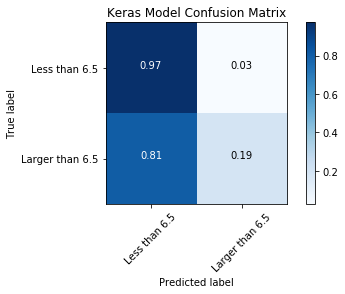

In [223]:
cf_keras = mt.confusion_matrix(y_test,yhat_keras)
plot_confusion_matrix(cf_keras,['Less than 6.5', 'Larger than 6.5'], normalize=True,title='Keras Model Confusion Matrix',cmap=plt.cm.Blues)

<h3>The Multi-Layer-Perceptron</h3>
<p>The MLP used for comparison with my best Keras model is shown below, with hidden layers of 10, 125, 37, and then 1. Similar to my Keras model. I prepare the data and then evaluate the accuracy and the scores for the purpose of creating the ROC and evaluating the area under it.</p>

In [228]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 125, 37, 1), random_state=1)
clf.fit(df_train[categorical_headers_ints+numeric_headers], y_train)
yhat_mlp = clf.predict(df_test[categorical_headers_ints+numeric_headers])
mlp_accu = accuracy_score(y_test, yhat_mlp)

In [229]:
print('The accuracy of the MLP model is found to be:',mlp_accu*100,'%')

The accuracy of the MLP model is found to be: 61.73285198555957 %


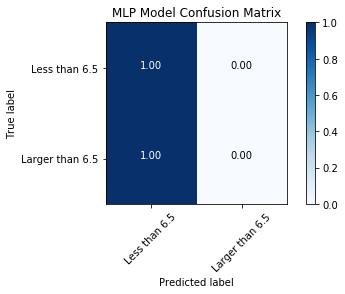

In [230]:
cf_mlp = mt.confusion_matrix(y_test,yhat_mlp)
plot_confusion_matrix(cf_mlp,['Less than 6.5', 'Larger than 6.5'], normalize=True,title='MLP Model Confusion Matrix',cmap=plt.cm.Blues)

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp

# This code snippet has been procured from the sci-kit learn docs along with the plotting code below
fpr_keras, tpr_keras, _ = roc_curve(y_test, yhat_keras)
roc_auc_keras = auc(fpr_keras, tpr_keras)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, yhat_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

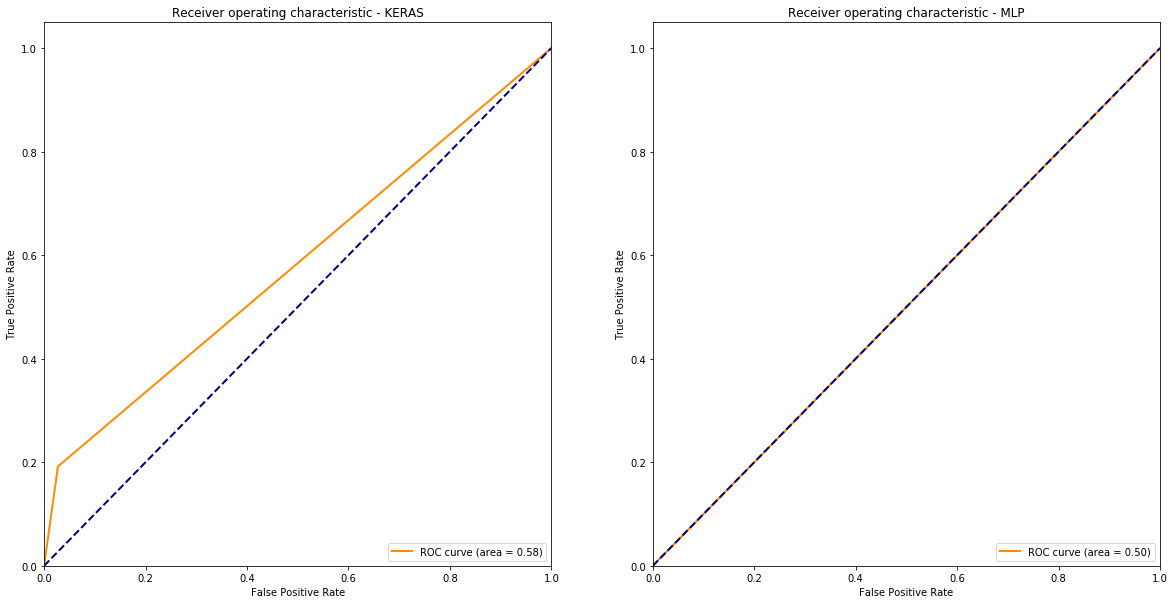

In [232]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
lw = 2
plt.plot(fpr_keras, tpr_keras, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_keras)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - KERAS')
plt.legend(loc="lower right")


plt.subplot(1,2,2)
lw = 2
plt.plot(fpr_mlp, tpr_mlp, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - MLP')
plt.legend(loc="lower right")
plt.show()

<p>As shown from the ROC curves above, the KERAS model is doing slightly better than the scikit-learn MLP model; which basically is classifying the movies by random guessing, as the ROC coincides exactly at the center diagonal of the plot for the MLP. The ROC areas of the plots are shown in the legendary of the plots. It is 0.58 for the KERAS model and 0.5 for the scikit-learn MLP model.</p>